本文参考了[官方样例](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py)。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams['font.sans-serif'] = ['Heiti TC']

标记（marker）用来在图上表示数据点的位置、类型，用于折线图和散点图中标记数据点。

在 `ax.plot` 和 `ax.scatter` 里与标记有关的参数有：
- `fmt`：为标记添加标记，控制线的颜色、款式
- `marker`：标记形状
- `markersize`：标记大小
- `markeredgewidth` 或 `mec`：标记边宽
- `markeredgecolor` 或 `mew`：标记边的颜色
- `markerfacecolor` 或 `mfc`：标记主要颜色
- `markerfacecoloralt` 或 `mfcalt`：在有渐变填充的标记中作为次要颜色

# `marker`：填充标记图案
matplotlib 包一共内置了 41 种图案。

In [105]:
Line2D.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 'none': 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

## 非填充标记
这种标记是单一颜色的，无法进行变色填充。

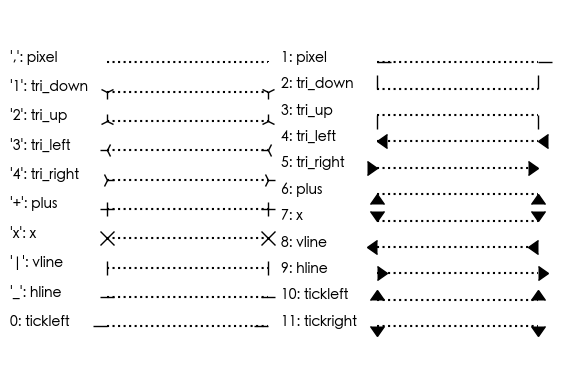

In [136]:
def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

fig, axs = plt.subplots(ncols=2)

# 非填充标记及其名称
unfilled_markers = [m for m, shape in Line2D.markers.items()
                    if shape != 'nothing' and m not in Line2D.filled_markers]
unfilled_names = [shape for m, shape in Line2D.markers.items()
                    if shape != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, (marker, name) in enumerate(zip(markers, unfilled_names)):
        # ax.text(-0.05, y, repr(marker) + ': ' + name, **text_style)
        ax.text(-0.3, y, repr(marker) + ': ' + name)
        ax.plot([0, 0.5], [y] * 2, marker=marker, markersize=10, linestyle=':', color='black')
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()
plt.show()

## 可填充标记

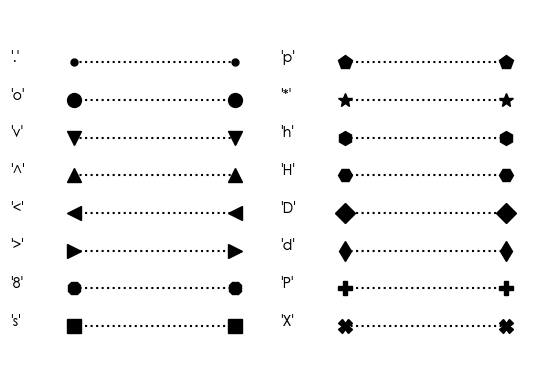

In [137]:
fig, axs = plt.subplots(ncols=2)

for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.4, y, repr(marker))
        ax.plot([y] * 2, marker=marker, markersize=10, color='black', linestyle=':')
    format_axes(ax)
plt.show()

## `markersize`
标记大小

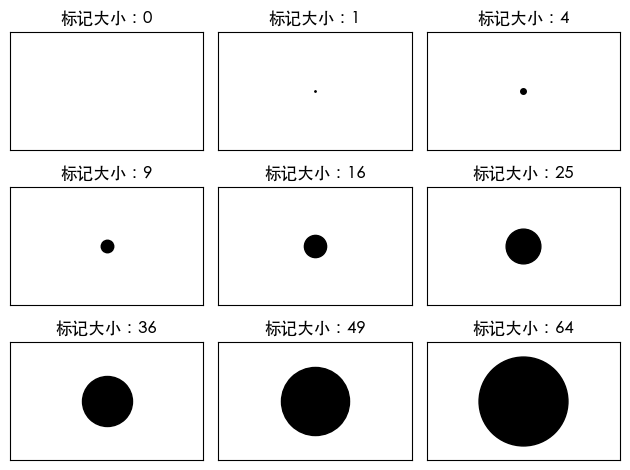

In [138]:
fig, axes = plt.subplots(3, 3)
axes = axes.reshape(-1)

for i in range(9):
    axes[i].plot([1], marker = 'o', markersize = i ** 2, color='k')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'标记大小：{i ** 2}')
fig.tight_layout()
plt.show()

# 填充颜色
## `markerfacecolor`
标记主体颜色

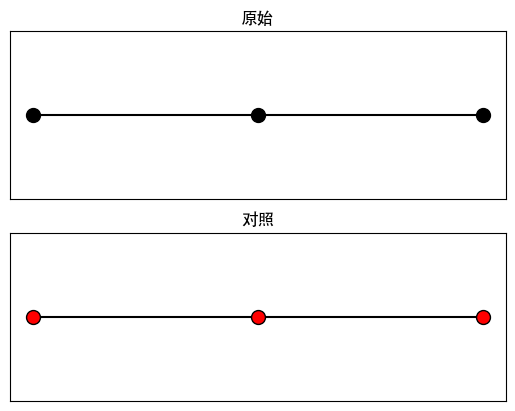

In [139]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot([1, 1, 1], marker='o', markersize=10, color='k')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('原始')

ax2.plot([1, 1, 1], color='k', marker='o', markersize=10, markerfacecolor='red')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('对照')

plt.show()

## `markeredgecolor` 
标记边线的颜色

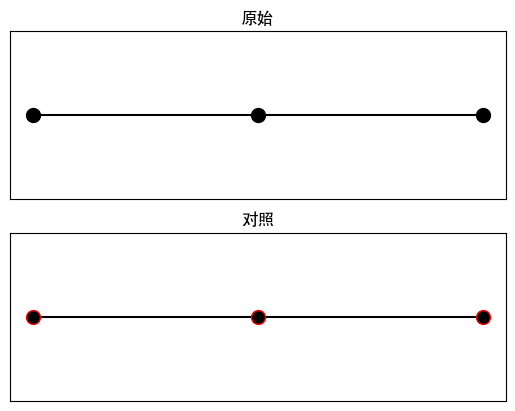

In [140]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot([1, 1, 1], color='k', marker='o', markersize=10)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('原始')

ax2.plot([1, 1, 1], color='k', marker='o', markersize=10, markeredgecolor='red')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('对照')

plt.show()

可以看出，`color` 影响的是整个标记（也包括线）的颜色，`makerfacecolor` 只影响标记主体的颜色，`markeredgecolor` 只影响标记边线的颜色。

## `markeredgewidth`
标记边线的粗细

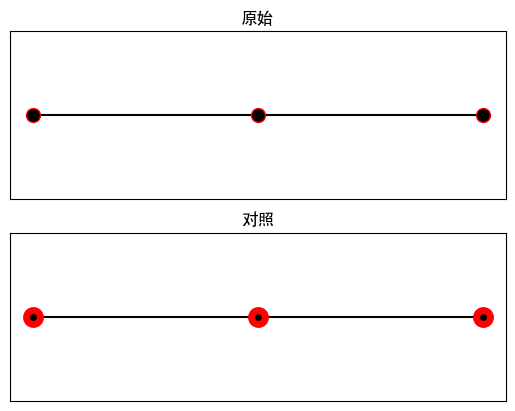

In [142]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot([1, 1, 1], color='k', marker='o', markersize=10, markeredgecolor='red')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('原始')

ax2.plot([1, 1, 1], color='k', marker='o', markersize=10, markeredgecolor='red', markeredgewidth=5)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('对照')

plt.show()

## `markerfacecoloralt`
标记填充的次要颜色，与参数 `fillstyle` 共同使用，当 `fillstyle` 不是 `full` 时有效。

In [107]:
Line2D.fillStyles

('full', 'left', 'right', 'bottom', 'top', 'none')

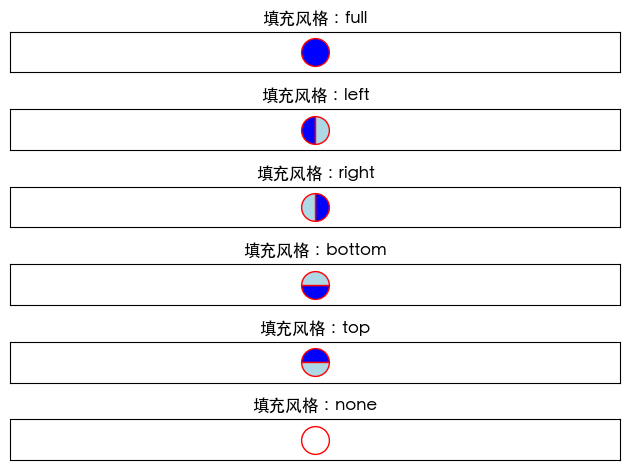

In [143]:
fig, axes = plt.subplots(len(Line2D.fillStyles))

for i, style in enumerate(Line2D.fillStyles):
    axes[i].plot([1], markersize = 20, marker = 'o',
                 markerfacecolor = 'blue', markerfacecoloralt = 'lightblue',
                 markeredgecolor = 'red', fillstyle = style)
    axes[i].set_title(f'填充风格：{style}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.tight_layout()
plt.show()

## `alpha`
标记填充的透明度，0 为完全透明，100 为完全不透明

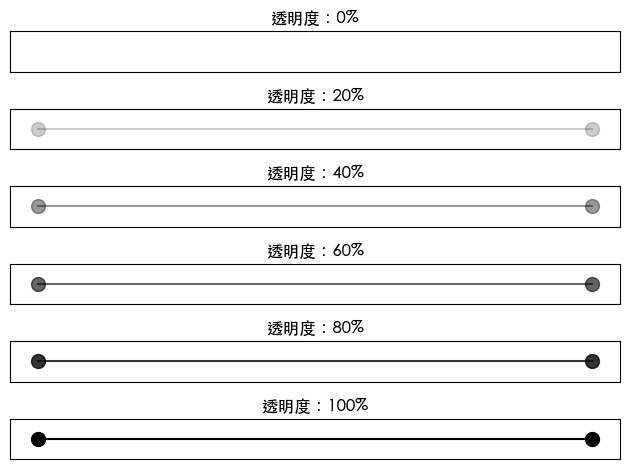

In [144]:
fig, axes = plt.subplots(6, 1)

for i, val in enumerate(range(6)):
    alpha = val * 2 / 10
    axes[i].plot([1] * 2, alpha=alpha, color='black', marker='o', markersize=10)
    axes[i].set_title(f'透明度：{alpha:.0%}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

# 使用 TeX 标记
只需将标记用 `$` 包上即可，matplotlib 可自动调用常用的 TeX 符号。

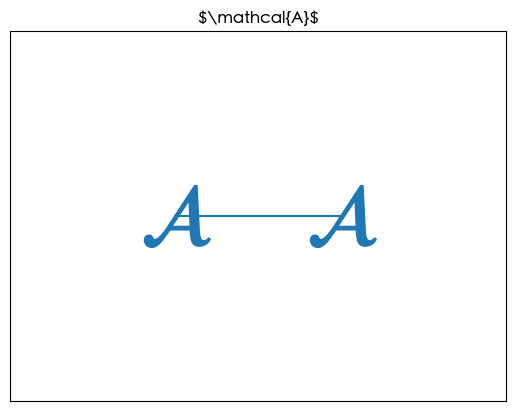

In [148]:
fig, ax = plt.subplots()

ax.plot([1, 1], marker='$\mathcal{A}$', markersize=50)
ax.set_title(r'\$\mathcal{A}\$')
ax.set_xlim([-1, 2])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('1-3-9.png')
plt.show()